<a href="https://colab.research.google.com/github/yutsehsieh/cg/blob/main/%E3%80%8C%E3%80%8C%E3%80%8CDeeplabv3_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
img = decode_image("/content/S__61571147.jpg")

from torchvision.io.image import decode_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image


# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()

In [ ]:
from torchvision.io import decode_image
from torchvision.models import resnet50, ResNet50_Weights


# 處理圖片與推論
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img_bgr = cv2.imread(img_path)
H, W = img_bgr.shape[:2]
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(type(img))
# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

Saving S__61571147.jpg to S__61571147 (2).jpg
<class 'numpy.ndarray'>


TypeError: Unexpected type <class 'numpy.ndarray'>

In [ ]:
# 1. 基本載入與上傳
import torch
import torchvision
from torchvision import transforms
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from types import SimpleNamespace
import json

In [ ]:
# 2. 上傳圖片
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Image loaded:", img_path)

Saving deeplab1.avif to deeplab1.avif
Image loaded: deeplab1.avif


In [ ]:
# 3. 上傳 ADE20K labels (可選)
print("\n（可選）請上傳 ADE20K labels 檔（純文字，每行一個 label），若無則程式內含預設。")
uploaded_lbl = files.upload()
label_list = None
for fn in uploaded_lbl:
    label_list = fn
    break



（可選）請上傳 ADE20K labels 檔（純文字，每行一個 label），若無則程式內含預設。


In [ ]:
# 4. 載入 label list
if label_list:
    with open(label_list, 'r', encoding='utf-8') as f:
        ade_labels = [line.strip() for line in f if line.strip()]
    print(f"Loaded {len(ade_labels)} ADE20K labels from {label_list}")
else:
    # ADE20K 150 類預設列表（部分示例標籤，實際請補齊）
    ade_labels = [
        "wall","building","sky","floor","tree","ceiling","road","bed","windowpane",
        "grass","cabinet","sidewalk","person","earth","door","table","mountain","plant",
        "curtain","chair","car","water","painting","sofa","shelf","house","sea","mirror",
        "rug","field","armchair","seat","fence","desk","rock","wardrobe","lamp","bathtub",
        "railing","cushion","base","box","column","signboard","chest of drawers","counter",
        "sand","sink","skyscraper","fireplace","refrigerator","grandstand","path","stairs",
        "runway","case","pool table","pillow","screen door","stairway","river","bridge",
        "bookcase","blind","coffee table","toilet","flower","book","hill","bench","countertop",
        "stove","palm","kitchen island","computer","swivel chair","boat","bar","arcade machine",
        "hovel","bus","towel","light","truck","tower","chandelier","awning","streetlight",
        "booth","television receiver","airplane","dirt track","apparel","pole","land","bannister",
        "escalator","ottoman","bottle","buffet","poster","stage","van","ship","fountain","conveyer belt",
        "canopy","washer","plaything","swimming pool","stool","barrel","basket","waterfall",
        "tent","bag","minibike","cradle","oven","ball","food","step","tank","trade name",
        "microwave","pot","animal","bicycle","lake","dishwasher","screen","blanket","sculpture",
        "hood","sconce","vase","traffic light","tray","ashcan","fan","pier","crt screen",
        "plate","monitor","bulletin board","shower","radiator","glass","clock","flag"
    ]
    print("Using default ADE20K labels (sample 150 classes).")

Using default ADE20K labels (sample 150 classes).


In [ ]:
# 5. 自動分類 labels -> manmade/natural/unknown
NATURAL_KW = [
    "sky","tree","grass","water","sea","river","lake","mountain","rock","sand",
    "flower","earth","plant","pond","field","rock","snow","cloud"
]
MANMADE_KW = [
    "wall","building","floor","road","bed","window","cabinet","sidewalk","door",
    "table","curtain","chair","car","painting","sofa","shelf","house","mirror",
    "rug","armchair","seat","fence","desk","wardrobe","lamp","railing","sink",
    "bathtub","sign","column","counter","stair","bridge","bookcase","pool","stairway",
    "book","bench","stove","bus","truck","tower","airplane","pole","lamp","television",
    "oven","bicycle","dishwasher","monitor","shower","fan","traffic","radiator","clock"
]

label_to_cat = {}
for idx, lab in enumerate(ade_labels):
    lw = lab.lower()
    cat = 'unknown'
    for kw in NATURAL_KW:
        if kw in lw:
            cat = 'natural'
            break
    if cat == 'unknown':
        for kw in MANMADE_KW:
            if kw in lw:
                cat = 'manmade'
                break
    label_to_cat[idx] = cat

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights

# 1. 載入 DeepLabV3 COCO 預訓練模型
weights = DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1
model = torch.hub.load('pytorch/vision', 'deeplabv3_resnet50', weights=weights)
model.eval()

# 2. 印出所有類別名稱
categories = weights.meta["categories"]
print("共有", len(categories), "個類別：")
for i, cat in enumerate(categories):
    print(f"{i}: {cat}")

# # 3. 讀取圖片
# img_path = "your_image.jpg"  # 換成你的圖片路徑
# img_bgr = cv2.imread(img_path)
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# # 4. 前處理
# preprocess = weights.transforms()
# input_tensor = preprocess(img_rgb).unsqueeze(0)

# # 5. 推論
# with torch.no_grad():
#     output = model(input_tensor)["out"][0]  # shape: (num_classes, H, W)

# # 6. 取 argmax 得到每個像素的類別 ID
# pred = output.argmax(0).cpu().numpy()

# # 7. 產生彩色 segmentation mask
# colors = np.random.randint(0, 255, size=(len(categories), 3), dtype=np.uint8)
# segmentation = colors[pred]

# # 8. 顯示結果
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(img_rgb)
# plt.title("Original Image")
# plt.axis("off")

# plt.subplot(1, 2, 2)
# plt.imshow(segmentation)
# plt.title("Segmentation (COCO 91 classes)")
# plt.axis("off")

# plt.show()


Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:00<00:00, 179MB/s]


共有 21 個類別：
0: __background__
1: aeroplane
2: bicycle
3: bird
4: boat
5: bottle
6: bus
7: car
8: cat
9: chair
10: cow
11: diningtable
12: dog
13: horse
14: motorbike
15: person
16: pottedplant
17: sheep
18: sofa
19: train
20: tvmonitor


In [ ]:
# 8. 計算比例
total = pred_clamped.size
counts = {"manmade":0, "natural":0, "unknown":0}
for cls_idx, cnt in zip(*np.unique(pred_clamped, return_counts=True)):
    if cls_idx == -1:
        counts["unknown"] += int(cnt)
    else:
        cat = label_to_cat.get(int(cls_idx), 'unknown')
        counts[cat] += int(cnt)
proportions = {k: v/total for k,v in counts.items()}
print("\n=== Pixel Count ===")
print(counts)
print("=== Proportions ===")
for k,v in proportions.items():
    print(f"{k:8s}: {v*100:.2f}%")



=== Pixel Count ===
{'manmade': 1186107, 'natural': 127711, 'unknown': 1514}
=== Proportions ===
manmade : 90.18%
natural : 9.71%
unknown : 0.12%


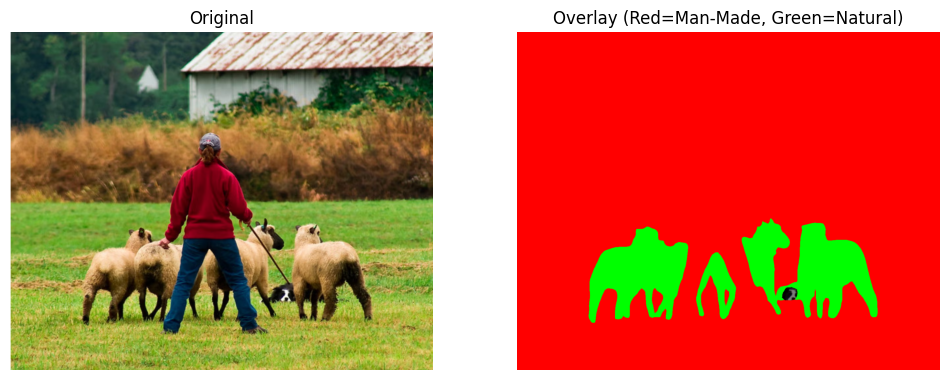

In [ ]:
# 9. Overlay 視覺化
overlay = img_rgb.copy()
overlay[pred_clamped>=0] = overlay[pred_clamped>=0] * 0.5
# 用紅綠標高: red for manmade, green for natural
overlay[np.isin(pred_clamped, [i for i,c in label_to_cat.items() if c=="manmade"])] = [255,0,0]
overlay[np.isin(pred_clamped, [i for i,c in label_to_cat.items() if c=="natural"])] = [0,255,0]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(overlay); plt.title("Overlay (Red=Man-Made, Green=Natural)"); plt.axis("off")
plt.show()